In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the data
import geopandas as gpd 
import fiona

In [13]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# geo_df = gpd.read_file('data/region_locations/avon-and-somerset/AE017.kml',driver='KML')

In [13]:
shape_df = gpd.read_file('data/Output_Areas_2021_EW_BGC_V2_-6371128854279904124/OA_2021_EW_BGC_V2.shp')

In [17]:
cleared_shape_df = shape_df[['OA21CD', 'LSOA21CD', 'geometry']]

In [18]:
crime_df = pd.read_csv('data/curated_data/crime.csv')

In [20]:
cleared_crime_df = crime_df[['Month', 'LSOA code', 'Crime type', 'Last outcome category']]

In [21]:
cleared_shape_df = cleared_shape_df.rename(columns = {'LSOA21CD': 'LSOA code'})

In [22]:
cleared_shape_df.head()

,OA21CD,LSOA code,geometry
0,E00000001,E01000001,"POLYGON ((532303.492 181814.110, 532213.378 18..."
1,E00000003,E01000001,"POLYGON ((532213.378 181846.192, 532190.539 18..."
2,E00000005,E01000001,"POLYGON ((532180.131 181763.020, 532219.161 18..."
3,E00000007,E01000001,"POLYGON ((532201.292 181668.180, 532267.728 18..."
4,E00000010,E01000003,"POLYGON ((532127.958 182133.192, 532089.264 18..."


In [35]:
demographic_df = pd.read_excel('data/demographic_data/saiefy1920finalqaddownload280923.xlsx', sheet_name='Total annual income')

In [47]:
demographic_df.tail()

,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
7200,W02000362,Newport 016,W06000022,Newport,W92000004,Wales,44500,52900,37500,15400
7201,W02000363,Newport 017,W06000022,Newport,W92000004,Wales,35600,42200,30100,12100
7202,W02000364,Newport 018,W06000022,Newport,W92000004,Wales,35100,41800,29400,12400
7203,W02000365,Newport 019,W06000022,Newport,W92000004,Wales,37100,44200,31200,13000
7204,W02000366,Newport 020,W06000022,Newport,W92000004,Wales,51500,61400,43300,18100


In [48]:
LSOA_codes_london = crime_df['LSOA code'].dropna().unique().tolist()

In [49]:
demographic_df_london = demographic_df[demographic_df['Unnamed: 4'].isin(LSOA_codes_london)]

In [50]:
demographic_df_london

,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9


In [53]:
shape_df_ldn = shape_df[shape_df['LSOA21CD'].isin(LSOA_codes_london)]
shape_df_ldn.head()

,OA21CD,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,E00000001,E01000001,City of London 001A,NaN,532250,181864,51.5202,-0.09523,3a44dd3d-5082-4a09-9b9c-3a5fadc811ed,"POLYGON ((532303.492 181814.110, 532213.378 18..."
1,E00000003,E01000001,City of London 001A,NaN,532171,181819,51.5198,-0.09638,f1216dc8-14d1-4857-9230-cab0641758fb,"POLYGON ((532213.378 181846.192, 532190.539 18..."
2,E00000005,E01000001,City of London 001A,NaN,532166,181722,51.5190,-0.09649,44d6f70f-549c-4288-9b6d-de2adbf02582,"POLYGON ((532180.131 181763.020, 532219.161 18..."
3,E00000007,E01000001,City of London 001A,NaN,532088,181473,51.5167,-0.09771,4dd683e1-9a5c-46cf-9e19-8465c8fbb6cb,"POLYGON ((532201.292 181668.180, 532267.728 18..."
4,E00000010,E01000003,City of London 001C,NaN,532092,182114,51.5225,-0.09741,7476781f-8fe4-4c9b-bde1-0eecbd146dff,"POLYGON ((532127.958 182133.192, 532089.264 18..."


In [55]:
boroughs = gpd.read_file('data/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp')

In [71]:
ldn_boroughs = boroughs['DISTRICT'].unique().tolist()

<Axes: >

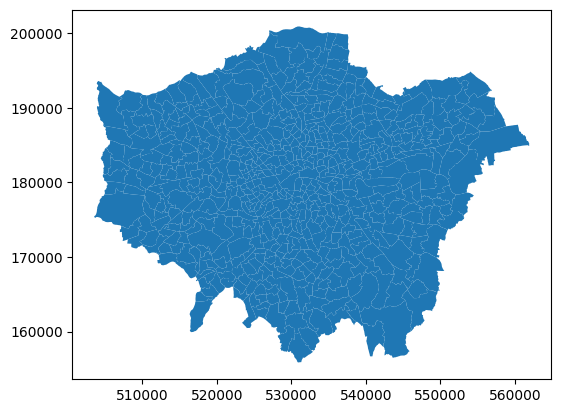

In [61]:
boroughs.plot()

In [62]:
crime_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,260968c6eec09d2ca5a0a895453cbeba1d429eb662022b...,2023-10,Metropolitan Police Service,Metropolitan Police Service,-0.534527,50.827329,On or near Banks Gardens,E01034816,Arun 004F,Drugs,Investigation complete; no suspect identified,NaN
1,8fdc14d25654b44657d67659b4699bc8e52c50666f18f2...,2023-10,Metropolitan Police Service,Metropolitan Police Service,0.853458,51.126012,On or near Augustus Walk,E01024008,Ashford 009D,Violence and sexual offences,Investigation complete; no suspect identified,NaN
2,NaN,2023-10,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2023-10,Metropolitan Police Service,Metropolitan Police Service,0.140194,51.582356,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2023-10,Metropolitan Police Service,Metropolitan Police Service,0.140194,51.582356,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [68]:
def get_district_name(lsoa_name):
    # print(lsoa_name)
    if pd.isna(lsoa_name):
        return 'Not identified'
    return ' '.join(lsoa_name.split()[:-1])

crime_df['District'] = crime_df['LSOA name'].apply(get_district_name)

In [70]:
crime_districts = crime_df['District'].unique()

In [76]:
# [district for district in crime_districts if district in ldn_boroughs]
[borough for borough in ldn_boroughs if borough not in crime_districts]

['City of Westminster', 'City and County of the City of London']

In [79]:
surveys = pd.read_excel('data/PAS_T&Cdashboard_to Q3 23-24.xlsx', sheet_name='Borough')

In [81]:
survey_boroughs = surveys['Borough'].unique().tolist()

In [83]:
len([boro for boro in survey_boroughs if boro not in ldn_boroughs])

1

In [84]:
[boro for boro in survey_boroughs if boro not in ldn_boroughs]

['Richmond Upon Thames']

In [87]:
shape_df['District'] = shape_df['LSOA21NM'].apply(get_district_name)

In [93]:
districts_shape = shape_df['District'].unique().tolist()

In [95]:
ldn_boroughs = [borough.upper() for borough in ldn_boroughs]
districts_shape = [district.upper() for district in districts_shape]
survey_boroughs = [borough.upper() for borough in survey_boroughs]
crime_districts = [district.upper() for district in crime_districts]

In [96]:
print(len(ldn_boroughs), len(districts_shape), len(survey_boroughs), len(crime_districts))

33 331 33 353


In [103]:
len([boro for boro in ldn_boroughs if boro in survey_boroughs])

32

In [102]:
[boro for boro in districts_shape if boro not in survey_boroughs]

['CITY OF LONDON',
 'WESTMINSTER',
 'BOLTON',
 'BURY',
 'MANCHESTER',
 'OLDHAM',
 'ROCHDALE',
 'SALFORD',
 'STOCKPORT',
 'TAMESIDE',
 'TRAFFORD',
 'WIGAN',
 'KNOWSLEY',
 'LIVERPOOL',
 'ST. HELENS',
 'SEFTON',
 'WIRRAL',
 'BARNSLEY',
 'DONCASTER',
 'ROTHERHAM',
 'SHEFFIELD',
 'GATESHEAD',
 'NEWCASTLE UPON TYNE',
 'NORTH TYNESIDE',
 'SOUTH TYNESIDE',
 'SUNDERLAND',
 'BIRMINGHAM',
 'COVENTRY',
 'DUDLEY',
 'SANDWELL',
 'SOLIHULL',
 'WALSALL',
 'WOLVERHAMPTON',
 'BRADFORD',
 'CALDERDALE',
 'KIRKLEES',
 'LEEDS',
 'WAKEFIELD',
 'HARTLEPOOL',
 'MIDDLESBROUGH',
 'REDCAR AND CLEVELAND',
 'STOCKTON-ON-TEES',
 'DARLINGTON',
 'HALTON',
 'WARRINGTON',
 'BLACKBURN WITH DARWEN',
 'BLACKPOOL',
 'KINGSTON UPON HULL',
 'EAST RIDING OF YORKSHIRE',
 'NORTH EAST LINCOLNSHIRE',
 'NORTH LINCOLNSHIRE',
 'YORK',
 'DERBY',
 'LEICESTER',
 'RUTLAND',
 'NOTTINGHAM',
 'HEREFORDSHIRE',
 'TELFORD AND WREKIN',
 'STOKE-ON-TRENT',
 'BATH AND NORTH EAST SOMERSET',
 'BRISTOL',
 'NORTH SOMERSET',
 'SOUTH GLOUCESTERSHIRE',
 

In [99]:
ldn_boroughs

['KINGSTON UPON THAMES',
 'CROYDON',
 'BROMLEY',
 'HOUNSLOW',
 'EALING',
 'HAVERING',
 'HILLINGDON',
 'HARROW',
 'BRENT',
 'BARNET',
 'LAMBETH',
 'SOUTHWARK',
 'LEWISHAM',
 'GREENWICH',
 'BEXLEY',
 'ENFIELD',
 'WALTHAM FOREST',
 'REDBRIDGE',
 'SUTTON',
 'RICHMOND UPON THAMES',
 'MERTON',
 'WANDSWORTH',
 'HAMMERSMITH AND FULHAM',
 'KENSINGTON AND CHELSEA',
 'CITY OF WESTMINSTER',
 'CAMDEN',
 'TOWER HAMLETS',
 'ISLINGTON',
 'HACKNEY',
 'HARINGEY',
 'NEWHAM',
 'BARKING AND DAGENHAM',
 'CITY AND COUNTY OF THE CITY OF LONDON']